In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import warnings

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

In [2]:
mpl.rcParams['font.sans-serif']=[u'SimHei']
mpl.rcParams['axes.unicode_minus']=False
warnings.filterwarnings('ignore',category=FutureWarning)

In [3]:
#import data
path='D:/Python/exercise/iris.data'
data=pd.read_csv(path,header=None)
x=data[list(range(4))]
y=pd.Categorical(data[4]).codes
print(type(x),type(y))

<class 'pandas.core.frame.DataFrame'> <class 'numpy.ndarray'>


In [4]:
#train-test-split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=12)
x_train=x_train.astype(np.float32)
y_train=y_train.astype(np.float32)

In [5]:
ss=MinMaxScaler()
x_train=ss.fit_transform(x_train)
x_test=ss.transform(x_test)

In [6]:
#model training
model=DecisionTreeClassifier(criterion='entropy',max_depth=20,random_state=0)
model.fit(x_train, y_train)
y_test=model.predict(x_test).reshape(-1)

In [7]:
#outcome
print('precision:',np.mean(y_test))
print('test model score:',model.score(x_test,y_test))
print('training model score:', model.score(x_train, y_train))

precision: 0.93333334
test model score: 1.0
training model score: 1.0


In [8]:
#plot
N=100
x1_min=np.min((x_train.T[0].min(),x_test.T[0].min()))
x1_max=np.max((x_train.T[0].max(),x_test.T[0].max()))
x2_min=np.min((x_train.T[1].min(),x_test.T[1].min()))
x2_max=np.max((x_train.T[1].max(),x_test.T[1].max()))

t1=np.linspace(x1_min,x1_max,N)
t2=np.linspace(x2_min,x2_max,N)
x1,x2 = np.meshgrid(t1,t2)


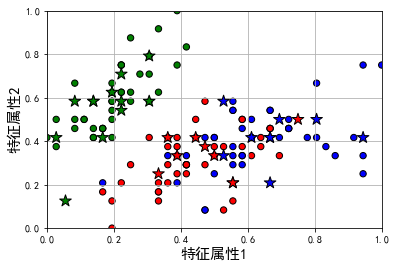

In [9]:
#plot
plt_light=mpl.colors.ListedColormap(['#A0FA0','#FFA0A0','#A0A0FF'])
plt_dark=mpl.colors.ListedColormap(['g','r','b'])

plt.figure(facecolor='w')
plt.scatter(x_test.T[0],x_test.T[1],c=y_test.ravel(),edgecolors='k',s=150,zorder=10,cmap=plt_dark,marker='*')
plt.scatter(x_train.T[0],x_train.T[1],c=y_train.ravel(),edgecolors='k',s=40,cmap=plt_dark)
plt.xlabel(u'特征属性1',fontsize=15)
plt.ylabel(u'特征属性2',fontsize=15)
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
plt.grid(True)
plt.show()

In [10]:
#可视化-1（不推荐）
from sklearn import tree
with open('D:/Python/exercise/iris.dot','w') as writer:
    tree.export_graphviz(decision_tree = model,out_file=writer)

In [13]:
#可视化-2
from sklearn import tree
import pydotplus

dot_data = tree.export_graphviz(decision_tree=model,out_file=None,feature_names=['A','B','C','D'],class_names=['1','2','3'],
                                filled=True,rounded=True,special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_pdf('D:/Python/exercise/iris.pdf')
graph.write_png('D:/Python/exercise/iris.png')

True